In [402]:
lineup = pd.read_csv("final_lineup.csv")

In [403]:
lineup = lineup.iloc[:,1:]

In [404]:
lineup.shape

(2186, 13)

In [405]:
lineup.head()

,player1,player2,player3,score1,score2,score3,cluster1,cluster2,cluster3,combination,+/-,TEAM,Season
0,R.Allen,K.Garnett,P.Pierce,0.339156,1.204143,1.587821,1.0,8.0,5.0,"[1, 5, 8]",8.2,BOS,2007-2008
1,K.Garnett,P.Pierce,R.Rondo,1.204143,1.587821,0.266984,8.0,5.0,4.0,"[4, 5, 8]",7.6,BOS,2007-2008
2,K.Garnett,K.Perkins,P.Pierce,1.204143,0.220225,1.587821,8.0,0.0,5.0,"[0, 5, 8]",7.5,BOS,2007-2008
3,K.Garnett,K.Perkins,R.Rondo,1.204143,0.220225,0.266984,8.0,0.0,4.0,"[0, 4, 8]",7.4,BOS,2007-2008
4,R.Allen,P.Pierce,R.Rondo,0.339156,1.587821,0.266984,1.0,5.0,4.0,"[1, 4, 5]",7.3,BOS,2007-2008


In [528]:
lineup[lineup["TEAM"]=="CLE"].sort_values(by="Season", ascending=False).head()

,player1,player2,player3,score1,score2,score3,cluster1,cluster2,cluster3,combination,+/-,TEAM,Season
2115,K.Irving,I.Shumpert,T.Thompson,0.893639,-0.586487,0.759455,4.0,1.0,0.0,"[0, 1, 4]",-0.2,CLE,2016-2017
1998,K.Irving,K.Love,J.Smith,0.893639,0.398681,0.256582,4.0,6.0,7.0,"[4, 6, 7]",3.4,CLE,2016-2017
1976,K.Irving,L.James,K.Love,0.893639,3.999378,0.398681,4.0,1.0,6.0,"[1, 4, 6]",4.8,CLE,2016-2017
1983,L.James,K.Love,J.Smith,3.999378,0.398681,0.256582,1.0,6.0,7.0,"[1, 6, 7]",4.0,CLE,2016-2017
1989,K.Irving,L.James,T.Thompson,0.893639,3.999378,0.759455,4.0,1.0,0.0,"[0, 1, 4]",3.7,CLE,2016-2017


----

## 딥러닝을 위한 데이터 처리

In [407]:
lineup2 = lineup[["score1","score2","score3", "+/-"]]
lineup2.head()

,score1,score2,score3,+/-
0,0.339156,1.204143,1.587821,8.2
1,1.204143,1.587821,0.266984,7.6
2,1.204143,0.220225,1.587821,7.5
3,1.204143,0.220225,0.266984,7.4
4,0.339156,1.587821,0.266984,7.3


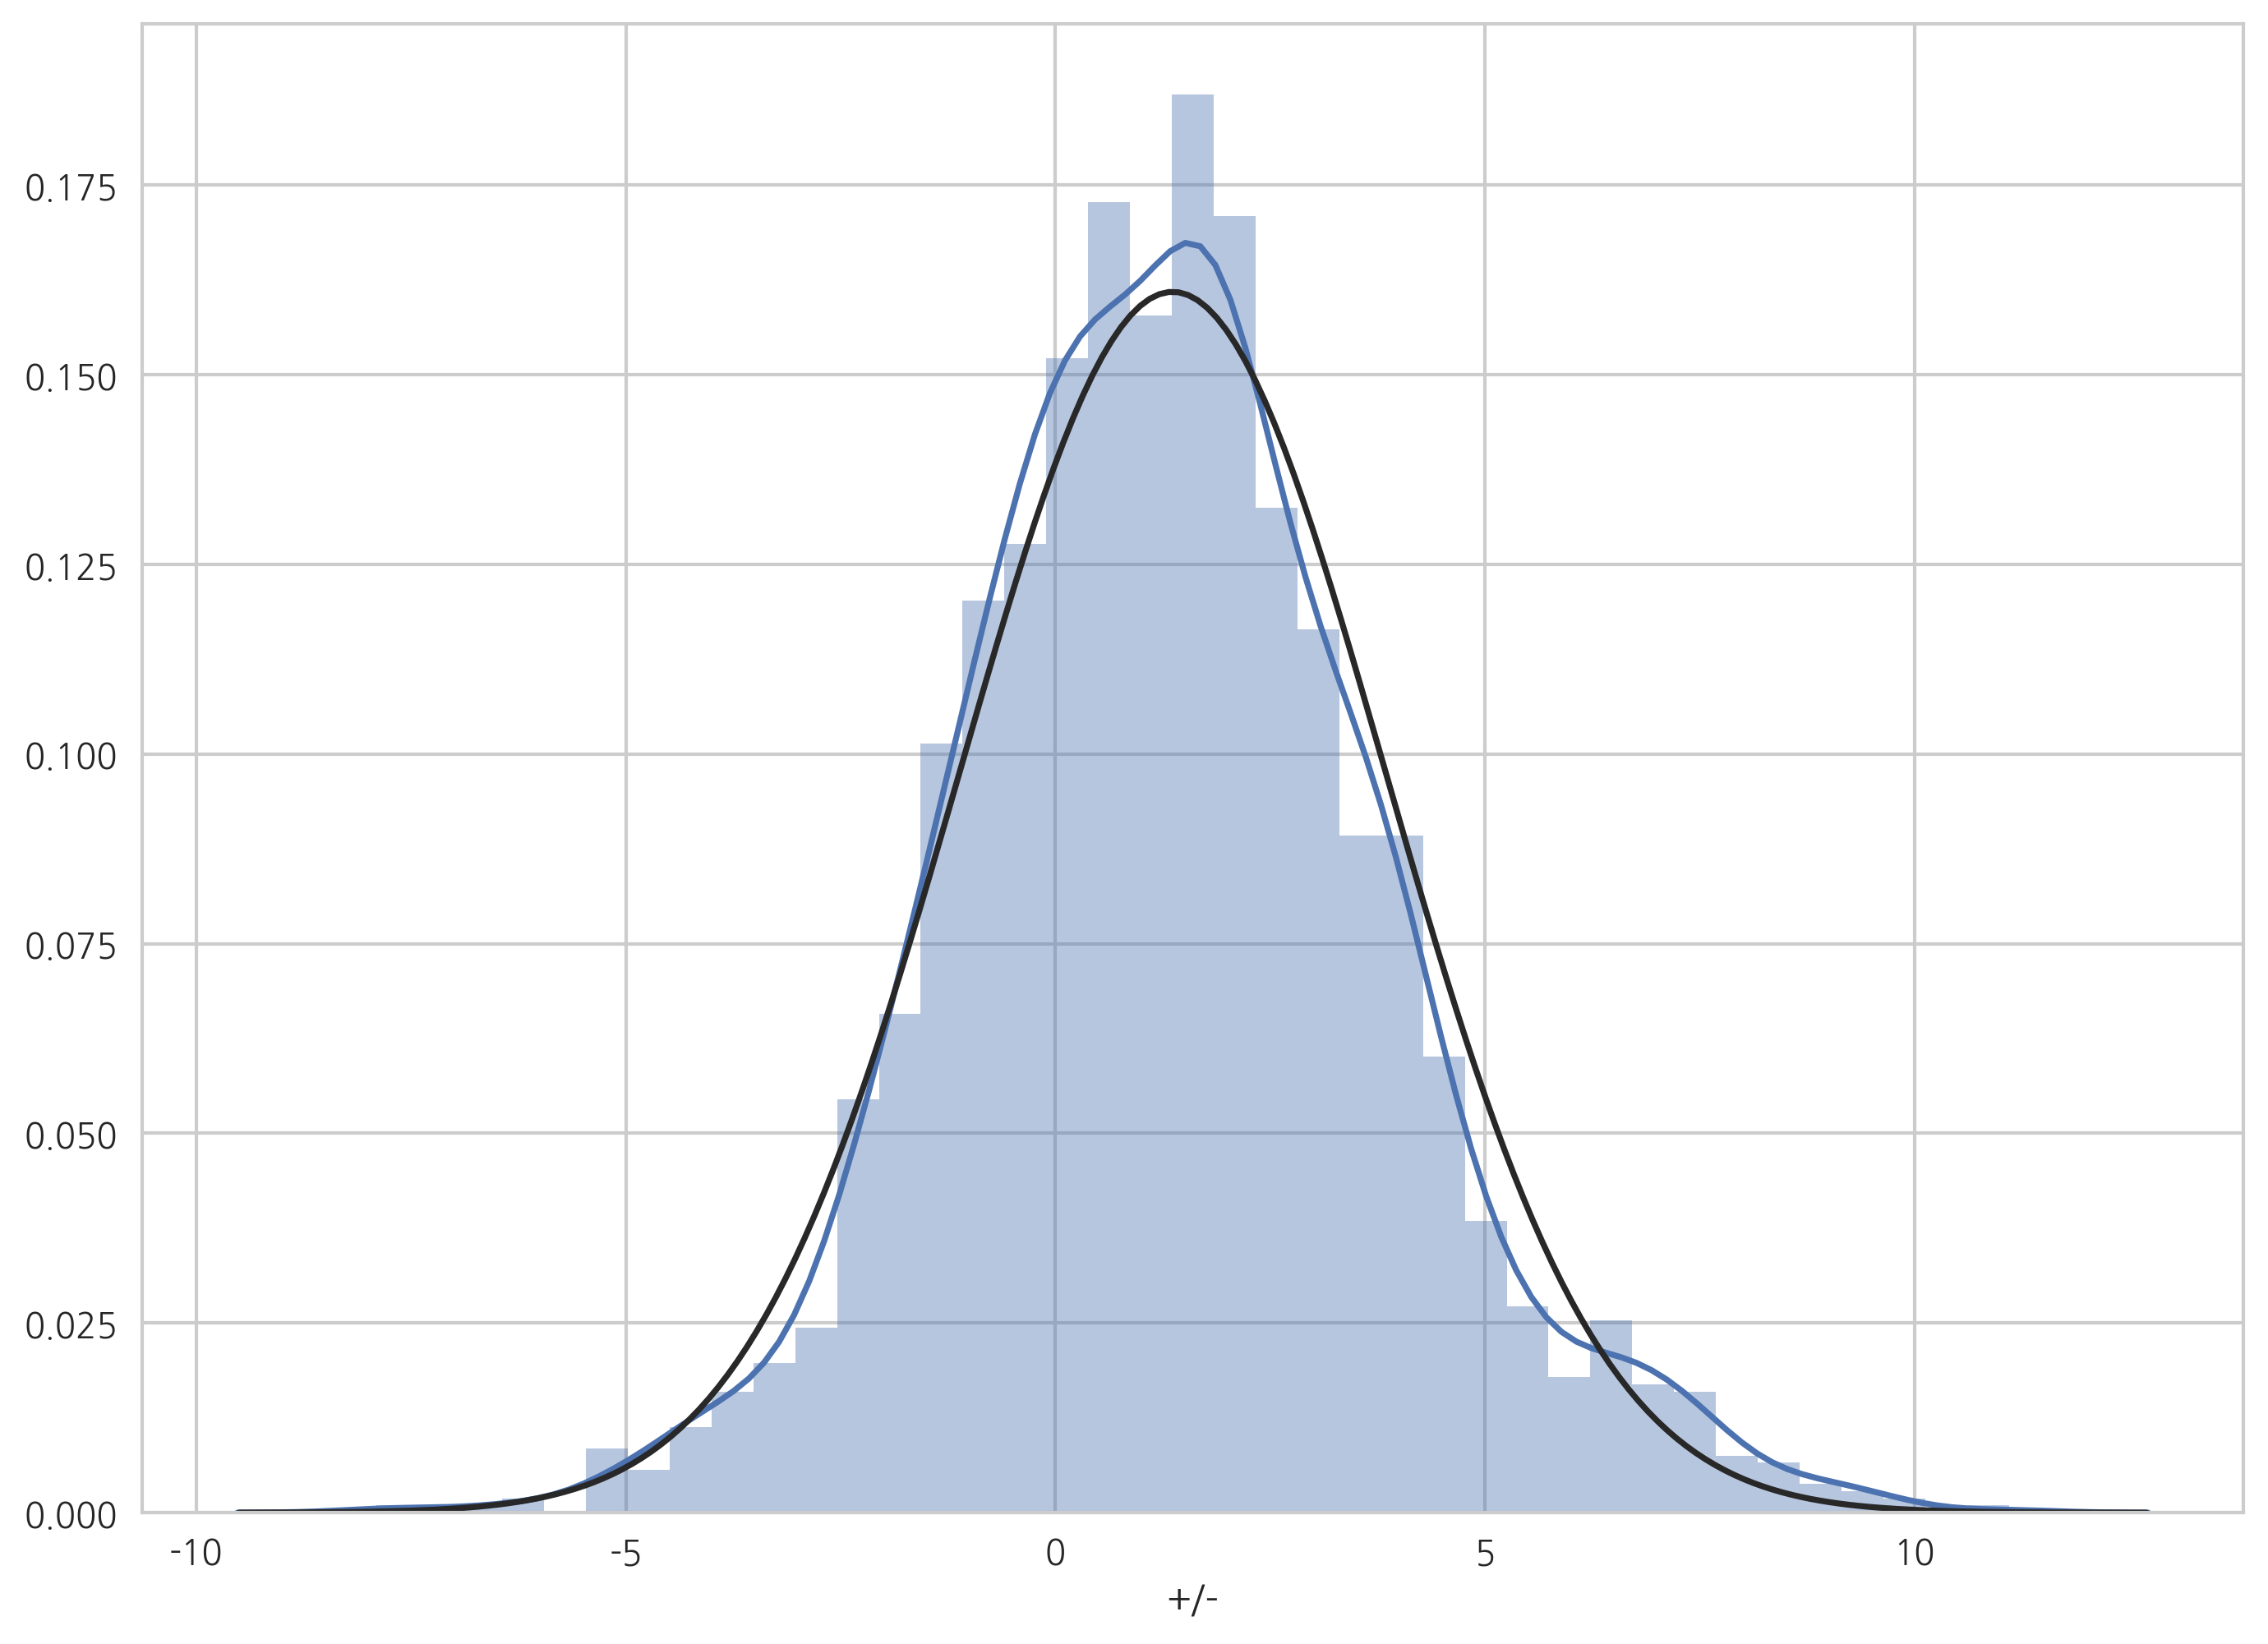

In [408]:
sns.distplot(lineup["+/-"], fit=sp.stats.norm)

In [621]:
np.percentile(lineup["+/-"], [0, 50, 100])

array([ -7.9,   1.3,  11.1])

In [622]:
bins = [ -8.0,  1.3,  11.2]
labels = [1, 0]
cats = pd.cut(lineup["+/-"], bins, labels=labels)

In [623]:
rank = cats

In [624]:
lineup2.head()

,score1,score2,score3
0,0.339156,1.204143,1.587821
1,1.204143,1.587821,0.266984
2,1.204143,0.220225,1.587821
3,1.204143,0.220225,0.266984
4,0.339156,1.587821,0.266984


In [625]:
lineup2.isnull().sum()

score1    0
score2    0
score3    0
dtype: int64

In [626]:
lineup2 = lineup2[["score1", "score2", "score3"]]

In [627]:
dummy = pd.get_dummies(lineup["combination"], prefix="comb")
lineup3 = pd.concat([lineup2, dummy], axis=1)

In [628]:
lineup3.shape

(2186, 182)

In [629]:
lineup3.head()

,score1,score2,score3,"comb_[0, 0, 2]","comb_[0, 0, 4]","comb_[0, 0, 5]","comb_[0, 0, 7]","comb_[0, 0, 9]","comb_[0, 1, 1]","comb_[0, 1, 2]",...,"comb_[6, 8, 9]","comb_[6, 9, 9]","comb_[7, 7, 8]","comb_[7, 7, 9]","comb_[7, 8, 8]","comb_[7, 8, 9]","comb_[7, 9, 9]","comb_[8, 8, 9]","comb_[8, 9, 9]","comb_[9, 9, 9]"
0,0.339156,1.204143,1.587821,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.204143,1.587821,0.266984,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.204143,0.220225,1.587821,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.204143,0.220225,0.266984,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.339156,1.587821,0.266984,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


----- 

# 퍼셉트론

In [630]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

X0 = lineup3
y0 = rank
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.1, random_state=1)

In [631]:
model = Perceptron(n_iter=1000, eta0=0.2).fit(X_train, y_train)

In [632]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = model.predict(X_test)

In [635]:
print(confusion_matrix(y_true, y_pred))

[[76 32]
 [59 52]]


In [636]:
from sklearn.metrics import *

print(classification_report(y_true, y_pred))
print("accuracy : ", accuracy_score(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.56      0.70      0.63       108
          1       0.62      0.47      0.53       111

avg / total       0.59      0.58      0.58       219

accuracy :  0.584474885845


# Deep-Learning

In [637]:
from keras.utils import np_utils 
from sklearn.model_selection import train_test_split

X0 = lineup3
target = rank
y0 = np_utils.to_categorical(target, 3)
X_train, X_test, y_train, y_test = train_test_split(X0, y0, test_size=0.1, random_state=1)

In [638]:
X_train.shape

(1967, 182)

In [639]:
y_train.shape

(1967, 3)

In [640]:
X_test.shape

(219, 182)

In [641]:
y_test.shape

(219, 3)

In [649]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(10, input_dim=182, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=["accuracy"])

In [651]:
%%time
hist = model.fit(np.array(X_train), np.array(y_train), nb_epoch=1000, batch_size=50, 
                 validation_data=(np.array(X_test), np.array(y_test)),  verbose=2)

Train on 1967 samples, validate on 219 samples
Epoch 1/1000
0s - loss: 0.5460 - acc: 0.7214 - val_loss: 0.7268 - val_acc: 0.6073
Epoch 2/1000
0s - loss: 0.5204 - acc: 0.7478 - val_loss: 0.7311 - val_acc: 0.6073
Epoch 3/1000
0s - loss: 0.5270 - acc: 0.7422 - val_loss: 0.7332 - val_acc: 0.5936
Epoch 4/1000
0s - loss: 0.5271 - acc: 0.7270 - val_loss: 0.7321 - val_acc: 0.6164
Epoch 5/1000
0s - loss: 0.5333 - acc: 0.7265 - val_loss: 0.7294 - val_acc: 0.6119
Epoch 6/1000
0s - loss: 0.5413 - acc: 0.7199 - val_loss: 0.7201 - val_acc: 0.6210
Epoch 7/1000
0s - loss: 0.5286 - acc: 0.7311 - val_loss: 0.7341 - val_acc: 0.6073
Epoch 8/1000
0s - loss: 0.5331 - acc: 0.7285 - val_loss: 0.7256 - val_acc: 0.6256
Epoch 9/1000
0s - loss: 0.5206 - acc: 0.7361 - val_loss: 0.7357 - val_acc: 0.6119
Epoch 10/1000
0s - loss: 0.5182 - acc: 0.7361 - val_loss: 0.7371 - val_acc: 0.6119
Epoch 11/1000
0s - loss: 0.5295 - acc: 0.7250 - val_loss: 0.7319 - val_acc: 0.6164
Epoch 12/1000
0s - loss: 0.5291 - acc: 0.7382 - v

0s - loss: 0.5141 - acc: 0.7331 - val_loss: 0.7852 - val_acc: 0.5982
Epoch 102/1000
0s - loss: 0.5081 - acc: 0.7433 - val_loss: 0.7877 - val_acc: 0.6027
Epoch 103/1000
0s - loss: 0.5093 - acc: 0.7346 - val_loss: 0.7959 - val_acc: 0.6073
Epoch 104/1000
0s - loss: 0.4977 - acc: 0.7489 - val_loss: 0.7898 - val_acc: 0.6164
Epoch 105/1000
0s - loss: 0.5026 - acc: 0.7473 - val_loss: 0.7924 - val_acc: 0.6027
Epoch 106/1000
0s - loss: 0.5058 - acc: 0.7367 - val_loss: 0.7894 - val_acc: 0.6073
Epoch 107/1000
0s - loss: 0.5220 - acc: 0.7270 - val_loss: 0.7878 - val_acc: 0.6119
Epoch 108/1000
0s - loss: 0.5091 - acc: 0.7407 - val_loss: 0.7960 - val_acc: 0.6073
Epoch 109/1000
0s - loss: 0.5081 - acc: 0.7336 - val_loss: 0.7926 - val_acc: 0.6073
Epoch 110/1000
0s - loss: 0.5073 - acc: 0.7367 - val_loss: 0.8013 - val_acc: 0.6073
Epoch 111/1000
0s - loss: 0.5068 - acc: 0.7463 - val_loss: 0.7950 - val_acc: 0.5936
Epoch 112/1000
0s - loss: 0.4929 - acc: 0.7372 - val_loss: 0.7880 - val_acc: 0.6164
Epoch 1

0s - loss: 0.4961 - acc: 0.7234 - val_loss: 0.8586 - val_acc: 0.6073
Epoch 200/1000
0s - loss: 0.4999 - acc: 0.7417 - val_loss: 0.8602 - val_acc: 0.6027
Epoch 201/1000
0s - loss: 0.4950 - acc: 0.7361 - val_loss: 0.8687 - val_acc: 0.6027
Epoch 202/1000
0s - loss: 0.4986 - acc: 0.7275 - val_loss: 0.8648 - val_acc: 0.6164
Epoch 203/1000
0s - loss: 0.4950 - acc: 0.7295 - val_loss: 0.8620 - val_acc: 0.6119
Epoch 204/1000
0s - loss: 0.5055 - acc: 0.7209 - val_loss: 0.8620 - val_acc: 0.6073
Epoch 205/1000
0s - loss: 0.4926 - acc: 0.7356 - val_loss: 0.8674 - val_acc: 0.6119
Epoch 206/1000
0s - loss: 0.4955 - acc: 0.7402 - val_loss: 0.8556 - val_acc: 0.6119
Epoch 207/1000
0s - loss: 0.5027 - acc: 0.7245 - val_loss: 0.8572 - val_acc: 0.6073
Epoch 208/1000
0s - loss: 0.4978 - acc: 0.7458 - val_loss: 0.8730 - val_acc: 0.6073
Epoch 209/1000
0s - loss: 0.4953 - acc: 0.7534 - val_loss: 0.8715 - val_acc: 0.5982
Epoch 210/1000
0s - loss: 0.4968 - acc: 0.7351 - val_loss: 0.8625 - val_acc: 0.6073
Epoch 2

0s - loss: 0.4894 - acc: 0.7356 - val_loss: 0.9491 - val_acc: 0.6210
Epoch 299/1000
0s - loss: 0.4641 - acc: 0.7412 - val_loss: 0.9695 - val_acc: 0.6301
Epoch 300/1000
0s - loss: 0.4771 - acc: 0.7346 - val_loss: 0.9673 - val_acc: 0.6301
Epoch 301/1000
0s - loss: 0.4860 - acc: 0.7412 - val_loss: 0.9665 - val_acc: 0.6301
Epoch 302/1000
0s - loss: 0.4782 - acc: 0.7433 - val_loss: 0.9562 - val_acc: 0.6210
Epoch 303/1000
0s - loss: 0.4840 - acc: 0.7372 - val_loss: 0.9704 - val_acc: 0.6301
Epoch 304/1000
0s - loss: 0.4767 - acc: 0.7326 - val_loss: 0.9608 - val_acc: 0.6301
Epoch 305/1000
0s - loss: 0.4814 - acc: 0.7438 - val_loss: 0.9878 - val_acc: 0.6164
Epoch 306/1000
0s - loss: 0.4760 - acc: 0.7483 - val_loss: 0.9614 - val_acc: 0.6210
Epoch 307/1000
0s - loss: 0.4825 - acc: 0.7463 - val_loss: 0.9840 - val_acc: 0.6438
Epoch 308/1000
0s - loss: 0.4726 - acc: 0.7377 - val_loss: 0.9724 - val_acc: 0.6393
Epoch 309/1000
0s - loss: 0.4840 - acc: 0.7402 - val_loss: 0.9841 - val_acc: 0.6164
Epoch 3

0s - loss: 0.4709 - acc: 0.7473 - val_loss: 1.0859 - val_acc: 0.6119
Epoch 398/1000
0s - loss: 0.4672 - acc: 0.7544 - val_loss: 1.1141 - val_acc: 0.6164
Epoch 399/1000
0s - loss: 0.4630 - acc: 0.7550 - val_loss: 1.1073 - val_acc: 0.6164
Epoch 400/1000
0s - loss: 0.4639 - acc: 0.7544 - val_loss: 1.1153 - val_acc: 0.6164
Epoch 401/1000
0s - loss: 0.4761 - acc: 0.7529 - val_loss: 1.1260 - val_acc: 0.6210
Epoch 402/1000
0s - loss: 0.4897 - acc: 0.7361 - val_loss: 1.0962 - val_acc: 0.6256
Epoch 403/1000
0s - loss: 0.4865 - acc: 0.7412 - val_loss: 1.0517 - val_acc: 0.6119
Epoch 404/1000
0s - loss: 0.4719 - acc: 0.7534 - val_loss: 1.1077 - val_acc: 0.6210
Epoch 405/1000
0s - loss: 0.4738 - acc: 0.7489 - val_loss: 1.0632 - val_acc: 0.6119
Epoch 406/1000
0s - loss: 0.4662 - acc: 0.7595 - val_loss: 1.0999 - val_acc: 0.6164
Epoch 407/1000
0s - loss: 0.4779 - acc: 0.7361 - val_loss: 1.1002 - val_acc: 0.6119
Epoch 408/1000
0s - loss: 0.4713 - acc: 0.7336 - val_loss: 1.0977 - val_acc: 0.6256
Epoch 4

0s - loss: 0.4746 - acc: 0.7417 - val_loss: 1.1757 - val_acc: 0.6073
Epoch 496/1000
0s - loss: 0.4761 - acc: 0.7367 - val_loss: 1.1998 - val_acc: 0.6347
Epoch 497/1000
0s - loss: 0.4574 - acc: 0.7539 - val_loss: 1.1961 - val_acc: 0.6301
Epoch 498/1000
0s - loss: 0.4683 - acc: 0.7483 - val_loss: 1.2078 - val_acc: 0.6301
Epoch 499/1000
0s - loss: 0.4728 - acc: 0.7356 - val_loss: 1.2139 - val_acc: 0.6164
Epoch 500/1000
0s - loss: 0.4666 - acc: 0.7534 - val_loss: 1.1996 - val_acc: 0.6210
Epoch 501/1000
0s - loss: 0.4712 - acc: 0.7361 - val_loss: 1.1884 - val_acc: 0.6301
Epoch 502/1000
0s - loss: 0.4688 - acc: 0.7438 - val_loss: 1.2065 - val_acc: 0.6210
Epoch 503/1000
0s - loss: 0.4800 - acc: 0.7428 - val_loss: 1.1969 - val_acc: 0.6164
Epoch 504/1000
0s - loss: 0.4415 - acc: 0.7595 - val_loss: 1.2530 - val_acc: 0.6256
Epoch 505/1000
0s - loss: 0.4813 - acc: 0.7260 - val_loss: 1.1999 - val_acc: 0.6073
Epoch 506/1000
0s - loss: 0.4545 - acc: 0.7580 - val_loss: 1.1871 - val_acc: 0.6073
Epoch 5

0s - loss: 0.4682 - acc: 0.7478 - val_loss: 1.3190 - val_acc: 0.6210
Epoch 594/1000
0s - loss: 0.4546 - acc: 0.7605 - val_loss: 1.3074 - val_acc: 0.6210
Epoch 595/1000
0s - loss: 0.4529 - acc: 0.7646 - val_loss: 1.2924 - val_acc: 0.6164
Epoch 596/1000
0s - loss: 0.4574 - acc: 0.7453 - val_loss: 1.3023 - val_acc: 0.6119
Epoch 597/1000
0s - loss: 0.4653 - acc: 0.7443 - val_loss: 1.3491 - val_acc: 0.6164
Epoch 598/1000
0s - loss: 0.4702 - acc: 0.7377 - val_loss: 1.3201 - val_acc: 0.6119
Epoch 599/1000
0s - loss: 0.4756 - acc: 0.7316 - val_loss: 1.3281 - val_acc: 0.6027
Epoch 600/1000
0s - loss: 0.4688 - acc: 0.7504 - val_loss: 1.3103 - val_acc: 0.6119
Epoch 601/1000
0s - loss: 0.4658 - acc: 0.7443 - val_loss: 1.3152 - val_acc: 0.6073
Epoch 602/1000
0s - loss: 0.4751 - acc: 0.7529 - val_loss: 1.3205 - val_acc: 0.6164
Epoch 603/1000
0s - loss: 0.4580 - acc: 0.7514 - val_loss: 1.3045 - val_acc: 0.6164
Epoch 604/1000
0s - loss: 0.4523 - acc: 0.7473 - val_loss: 1.3254 - val_acc: 0.6027
Epoch 6

0s - loss: 0.4588 - acc: 0.7565 - val_loss: 1.3212 - val_acc: 0.6210
Epoch 693/1000
0s - loss: 0.4464 - acc: 0.7626 - val_loss: 1.3418 - val_acc: 0.6210
Epoch 694/1000
0s - loss: 0.4678 - acc: 0.7473 - val_loss: 1.2857 - val_acc: 0.6164
Epoch 695/1000
0s - loss: 0.4659 - acc: 0.7463 - val_loss: 1.3169 - val_acc: 0.6210
Epoch 696/1000
0s - loss: 0.4676 - acc: 0.7448 - val_loss: 1.3359 - val_acc: 0.6210
Epoch 697/1000
0s - loss: 0.4692 - acc: 0.7438 - val_loss: 1.3215 - val_acc: 0.6210
Epoch 698/1000
0s - loss: 0.4609 - acc: 0.7499 - val_loss: 1.3502 - val_acc: 0.6210
Epoch 699/1000
0s - loss: 0.4672 - acc: 0.7529 - val_loss: 1.3197 - val_acc: 0.6164
Epoch 700/1000
0s - loss: 0.4569 - acc: 0.7555 - val_loss: 1.3364 - val_acc: 0.6164
Epoch 701/1000
0s - loss: 0.4672 - acc: 0.7407 - val_loss: 1.3357 - val_acc: 0.6210
Epoch 702/1000
0s - loss: 0.4581 - acc: 0.7499 - val_loss: 1.3427 - val_acc: 0.6256
Epoch 703/1000
0s - loss: 0.4644 - acc: 0.7433 - val_loss: 1.3816 - val_acc: 0.6164
Epoch 7

0s - loss: 0.4691 - acc: 0.7392 - val_loss: 1.4080 - val_acc: 0.6210
Epoch 792/1000
0s - loss: 0.4713 - acc: 0.7560 - val_loss: 1.4215 - val_acc: 0.6210
Epoch 793/1000
0s - loss: 0.4647 - acc: 0.7392 - val_loss: 1.4164 - val_acc: 0.6119
Epoch 794/1000
0s - loss: 0.4462 - acc: 0.7641 - val_loss: 1.4238 - val_acc: 0.6119
Epoch 795/1000
0s - loss: 0.4459 - acc: 0.7575 - val_loss: 1.4220 - val_acc: 0.6119
Epoch 796/1000
0s - loss: 0.4574 - acc: 0.7539 - val_loss: 1.3819 - val_acc: 0.6119
Epoch 797/1000
0s - loss: 0.4675 - acc: 0.7387 - val_loss: 1.3947 - val_acc: 0.6119
Epoch 798/1000
0s - loss: 0.4627 - acc: 0.7468 - val_loss: 1.4173 - val_acc: 0.6119
Epoch 799/1000
0s - loss: 0.4592 - acc: 0.7539 - val_loss: 1.4032 - val_acc: 0.6073
Epoch 800/1000
0s - loss: 0.4692 - acc: 0.7372 - val_loss: 1.4223 - val_acc: 0.6027
Epoch 801/1000
0s - loss: 0.4698 - acc: 0.7428 - val_loss: 1.4325 - val_acc: 0.6164
Epoch 802/1000
0s - loss: 0.4576 - acc: 0.7524 - val_loss: 1.4428 - val_acc: 0.6256
Epoch 8

0s - loss: 0.4622 - acc: 0.7524 - val_loss: 1.4274 - val_acc: 0.6164
Epoch 891/1000
0s - loss: 0.4623 - acc: 0.7463 - val_loss: 1.4439 - val_acc: 0.6119
Epoch 892/1000
0s - loss: 0.4723 - acc: 0.7443 - val_loss: 1.4568 - val_acc: 0.6119
Epoch 893/1000
0s - loss: 0.4440 - acc: 0.7611 - val_loss: 1.4497 - val_acc: 0.6164
Epoch 894/1000
0s - loss: 0.4619 - acc: 0.7428 - val_loss: 1.4308 - val_acc: 0.6210
Epoch 895/1000
0s - loss: 0.4647 - acc: 0.7356 - val_loss: 1.4569 - val_acc: 0.6164
Epoch 896/1000
0s - loss: 0.4560 - acc: 0.7473 - val_loss: 1.4630 - val_acc: 0.6210
Epoch 897/1000
0s - loss: 0.4490 - acc: 0.7666 - val_loss: 1.4408 - val_acc: 0.6210
Epoch 898/1000
0s - loss: 0.4699 - acc: 0.7489 - val_loss: 1.3706 - val_acc: 0.6119
Epoch 899/1000
0s - loss: 0.4644 - acc: 0.7529 - val_loss: 1.4134 - val_acc: 0.6210
Epoch 900/1000
0s - loss: 0.4526 - acc: 0.7529 - val_loss: 1.4473 - val_acc: 0.6119
Epoch 901/1000
0s - loss: 0.4656 - acc: 0.7316 - val_loss: 1.4020 - val_acc: 0.6073
Epoch 9

0s - loss: 0.4544 - acc: 0.7560 - val_loss: 1.4714 - val_acc: 0.5982
Epoch 991/1000
0s - loss: 0.4549 - acc: 0.7504 - val_loss: 1.4470 - val_acc: 0.6073
Epoch 992/1000
0s - loss: 0.4536 - acc: 0.7489 - val_loss: 1.4245 - val_acc: 0.6027
Epoch 993/1000
0s - loss: 0.4542 - acc: 0.7565 - val_loss: 1.4700 - val_acc: 0.6073
Epoch 994/1000
0s - loss: 0.4596 - acc: 0.7509 - val_loss: 1.4788 - val_acc: 0.6119
Epoch 995/1000
0s - loss: 0.4622 - acc: 0.7499 - val_loss: 1.4803 - val_acc: 0.6027
Epoch 996/1000
0s - loss: 0.4548 - acc: 0.7519 - val_loss: 1.4950 - val_acc: 0.6073
Epoch 997/1000
0s - loss: 0.4686 - acc: 0.7433 - val_loss: 1.4604 - val_acc: 0.6073
Epoch 998/1000
0s - loss: 0.4583 - acc: 0.7422 - val_loss: 1.4518 - val_acc: 0.6073
Epoch 999/1000
0s - loss: 0.4654 - acc: 0.7473 - val_loss: 1.4844 - val_acc: 0.6027
Epoch 1000/1000
0s - loss: 0.4530 - acc: 0.7382 - val_loss: 1.4754 - val_acc: 0.6027
CPU times: user 1min 48s, sys: 1.49 s, total: 1min 49s
Wall time: 1min 51s


In [652]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict_classes(np.array(X_test), verbose=0)

print("                 * Confusion Matrix *")
print("----------------------------------------------------------")
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print("                 ",confusion_matrix(np.argmax(y_test, axis=1), y_pred)[0])
print("                 ",confusion_matrix(np.argmax(y_test, axis=1), y_pred)[1])
print("                 ",confusion_matrix(np.argmax(y_test, axis=1), y_pred)[2])
print("                 ",confusion_matrix(np.argmax(y_test, axis=1), y_pred)[3])
print("                 ",confusion_matrix(np.argmax(y_test, axis=1), y_pred)[4])
print("")
print("")
print("               * Classification Report *")
print("----------------------------------------------------------")
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print("")
print("                   * Test Accuracy *")
print("----------------------------------------------------------")
print("            Test accuracy =", accuracy_score(np.argmax(y_test, axis=1), y_pred))

                 * Confusion Matrix *
----------------------------------------------------------
                  [65 43]
                  [44 67]


IndexError: index 2 is out of bounds for axis 0 with size 2

-------

### 모델 저장 후 로드 

In [206]:
model.save('first_model.hdf5')

In [297]:
from keras.models import load_model

model2 = load_model('first_model.hdf5')
y_pred = model2.predict_classes(np.array(X_test), verbose=0)

print("* Confusion Matrix")
print("----------------------------------------------------------")
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))
print("")
print("")
print("* Classification Report")
print("----------------------------------------------------------")
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print("")
print("")
print("----------------------------------------------------------")
print("* Test Accuracy")
print("Test accuracy =", accuracy_score(np.argmax(y_test, axis=1), y_pred))

* Confusion Matrix
----------------------------------------------------------
[[21  3  0  0  0  0]
 [ 0 38  0  0  0  0]
 [ 0  5 40  1  0  0]
 [ 0  0  0 38  1  0]
 [ 0  0  0  0 47  1]
 [ 0  0  0  0  0 24]]


* Classification Report
----------------------------------------------------------
             precision    recall  f1-score   support

          0       1.00      0.88      0.93        24
          1       0.83      1.00      0.90        38
          2       1.00      0.87      0.93        46
          3       0.97      0.97      0.97        39
          4       0.98      0.98      0.98        48
          5       0.96      1.00      0.98        24

avg / total       0.96      0.95      0.95       219



----------------------------------------------------------
* Test Accuracy
Test accuracy = 0.949771689498


--------

## 새로운 선수를 영입한다면 ?

In [426]:
twolineup = lineup[(lineup["TEAM"]=="CLE") & (lineup["Season"]=="2016-2017")].iloc[1,:]

In [427]:
for i in range(12):
    twolineup = pd.concat([twolineup, twolineup], axis=1)

In [428]:
twolineup = twolineup.T

In [429]:
twolineup.head()

,player1,player2,player3,score1,score2,score3,cluster1,cluster2,cluster3,combination,+/-,TEAM,Season
1983,L.James,K.Love,J.Smith,3.99938,0.398681,0.256582,1,6,7,"[1, 6, 7]",4,CLE,2016-2017
1983,L.James,K.Love,J.Smith,3.99938,0.398681,0.256582,1,6,7,"[1, 6, 7]",4,CLE,2016-2017
1983,L.James,K.Love,J.Smith,3.99938,0.398681,0.256582,1,6,7,"[1, 6, 7]",4,CLE,2016-2017
1983,L.James,K.Love,J.Smith,3.99938,0.398681,0.256582,1,6,7,"[1, 6, 7]",4,CLE,2016-2017
1983,L.James,K.Love,J.Smith,3.99938,0.398681,0.256582,1,6,7,"[1, 6, 7]",4,CLE,2016-2017


In [430]:
player = pd.read_csv("zdata1.csv")

In [431]:
player = player.iloc[:,1:]

In [432]:
player = player[player["Season"]=="2016-2017"]

In [433]:
player = player.reset_index()
del player["index"]

In [434]:
player = player[["Player", "cluster", "zscore"]]

In [435]:
player.columns = ["player3", "cluster3", "score3"]
player.head()

,player3,cluster3,score3
0,Joel Embiid,0,0.468123
1,Hassan Whiteside,0,2.071896
2,Nikola Jokic,0,-0.249133
3,Nikola Vucevic,0,-0.087345
4,Rudy Gobert,0,3.289272


In [436]:
player.shape

(355, 3)

In [437]:
twolineup = twolineup.iloc[:355,:]

In [438]:
twolineup.shape

(355, 13)

In [439]:
twolineup = twolineup.reset_index()
del twolineup["index"]

In [440]:
twolineup["player3"] = player["player3"]
twolineup["cluster3"] = player["cluster3"]
twolineup["score3"] = player["score3"]

In [441]:
twolineup.head()

,player1,player2,player3,score1,score2,score3,cluster1,cluster2,cluster3,combination,+/-,TEAM,Season
0,L.James,K.Love,Joel Embiid,3.99938,0.398681,0.468123,1,6,0,"[1, 6, 7]",4,CLE,2016-2017
1,L.James,K.Love,Hassan Whiteside,3.99938,0.398681,2.071896,1,6,0,"[1, 6, 7]",4,CLE,2016-2017
2,L.James,K.Love,Nikola Jokic,3.99938,0.398681,-0.249133,1,6,0,"[1, 6, 7]",4,CLE,2016-2017
3,L.James,K.Love,Nikola Vucevic,3.99938,0.398681,-0.087345,1,6,0,"[1, 6, 7]",4,CLE,2016-2017
4,L.James,K.Love,Rudy Gobert,3.99938,0.398681,3.289272,1,6,0,"[1, 6, 7]",4,CLE,2016-2017


In [442]:
combination = []

for i in range(len(twolineup)):
    temp = []
    temp.append(int(twolineup["cluster1"][i]))
    temp.append(int(twolineup["cluster2"][i]))
    temp.append(int(twolineup["cluster3"][i]))
    temp.sort()
    combination.append(temp)
    
twolineup["combination"] = combination
twolineup["combination"] = twolineup["combination"].astype(str)

In [443]:
twolineup.head()

,player1,player2,player3,score1,score2,score3,cluster1,cluster2,cluster3,combination,+/-,TEAM,Season
0,L.James,K.Love,Joel Embiid,3.99938,0.398681,0.468123,1,6,0,"[0, 1, 6]",4,CLE,2016-2017
1,L.James,K.Love,Hassan Whiteside,3.99938,0.398681,2.071896,1,6,0,"[0, 1, 6]",4,CLE,2016-2017
2,L.James,K.Love,Nikola Jokic,3.99938,0.398681,-0.249133,1,6,0,"[0, 1, 6]",4,CLE,2016-2017
3,L.James,K.Love,Nikola Vucevic,3.99938,0.398681,-0.087345,1,6,0,"[0, 1, 6]",4,CLE,2016-2017
4,L.James,K.Love,Rudy Gobert,3.99938,0.398681,3.289272,1,6,0,"[0, 1, 6]",4,CLE,2016-2017


In [444]:
twolineup = twolineup.iloc[:,:10]
twolineup.head()

,player1,player2,player3,score1,score2,score3,cluster1,cluster2,cluster3,combination
0,L.James,K.Love,Joel Embiid,3.99938,0.398681,0.468123,1,6,0,"[0, 1, 6]"
1,L.James,K.Love,Hassan Whiteside,3.99938,0.398681,2.071896,1,6,0,"[0, 1, 6]"
2,L.James,K.Love,Nikola Jokic,3.99938,0.398681,-0.249133,1,6,0,"[0, 1, 6]"
3,L.James,K.Love,Nikola Vucevic,3.99938,0.398681,-0.087345,1,6,0,"[0, 1, 6]"
4,L.James,K.Love,Rudy Gobert,3.99938,0.398681,3.289272,1,6,0,"[0, 1, 6]"


-----

## 앞에서 만든 모델을 이용해서 어느 선수를 영입하면 좋을지 예측 

In [445]:
twolineup2 = twolineup[["score1", "score2", "score3"]]

In [446]:
dummy = pd.get_dummies(twolineup["combination"], prefix="comb")
twolineup2 = pd.concat([twolineup2, dummy], axis=1)

In [447]:
twolineup2.shape

(355, 13)

In [448]:
twolineup2.head()

,score1,score2,score3,"comb_[0, 1, 6]","comb_[1, 1, 6]","comb_[1, 2, 6]","comb_[1, 3, 6]","comb_[1, 4, 6]","comb_[1, 5, 6]","comb_[1, 6, 6]","comb_[1, 6, 7]","comb_[1, 6, 8]","comb_[1, 6, 9]"
0,3.99938,0.398681,0.468123,1,0,0,0,0,0,0,0,0,0
1,3.99938,0.398681,2.071896,1,0,0,0,0,0,0,0,0,0
2,3.99938,0.398681,-0.249133,1,0,0,0,0,0,0,0,0,0
3,3.99938,0.398681,-0.087345,1,0,0,0,0,0,0,0,0,0
4,3.99938,0.398681,3.289272,1,0,0,0,0,0,0,0,0,0


In [452]:
a = lineup3.columns

In [456]:
 comb =      [ 'comb_[0, 0, 2]', 'comb_[0, 0, 4]',
       'comb_[0, 0, 5]', 'comb_[0, 0, 7]', 'comb_[0, 0, 9]',
       'comb_[0, 1, 1]', 'comb_[0, 1, 2]', 'comb_[0, 1, 3]',
       'comb_[0, 1, 4]', 'comb_[0, 1, 5]', 
       'comb_[0, 1, 7]', 'comb_[0, 1, 8]', 'comb_[0, 1, 9]',
       'comb_[0, 2, 3]', 'comb_[0, 2, 4]', 'comb_[0, 2, 5]',
       'comb_[0, 2, 6]', 'comb_[0, 2, 7]', 'comb_[0, 2, 8]',
       'comb_[0, 2, 9]', 'comb_[0, 3, 3]', 'comb_[0, 3, 4]',
       'comb_[0, 3, 5]', 'comb_[0, 3, 7]', 'comb_[0, 3, 8]',
       'comb_[0, 3, 9]', 'comb_[0, 4, 4]', 'comb_[0, 4, 5]',
       'comb_[0, 4, 6]', 'comb_[0, 4, 7]', 'comb_[0, 4, 8]',
       'comb_[0, 4, 9]', 'comb_[0, 5, 5]', 'comb_[0, 5, 6]',
       'comb_[0, 5, 7]', 'comb_[0, 5, 8]', 'comb_[0, 5, 9]',
       'comb_[0, 6, 7]', 'comb_[0, 6, 9]', 'comb_[0, 7, 7]',
       'comb_[0, 7, 8]', 'comb_[0, 7, 9]', 'comb_[0, 8, 9]',
       'comb_[0, 9, 9]', 'comb_[1, 1, 2]', 'comb_[1, 1, 3]',
       'comb_[1, 1, 4]', 'comb_[1, 1, 5]', 
       'comb_[1, 1, 7]', 'comb_[1, 1, 8]', 'comb_[1, 1, 9]',
       'comb_[1, 2, 3]', 'comb_[1, 2, 5]',
       'comb_[1, 2, 7]', 'comb_[1, 2, 8]', 'comb_[1, 2, 9]',
       'comb_[1, 3, 3]', 'comb_[1, 3, 4]', 'comb_[1, 3, 5]',
       'comb_[1, 3, 7]', 'comb_[1, 3, 8]',
       'comb_[1, 3, 9]', 'comb_[1, 4, 4]', 'comb_[1, 4, 5]',
 'comb_[1, 4, 7]', 'comb_[1, 4, 8]',
       'comb_[1, 4, 9]',  'comb_[1, 5, 7]',
       'comb_[1, 5, 8]', 'comb_[1, 5, 9]', 

       'comb_[1, 7, 8]', 'comb_[1, 7, 9]', 'comb_[1, 8, 8]',
       'comb_[1, 8, 9]', 'comb_[1, 9, 9]', 'comb_[2, 3, 3]',
       'comb_[2, 3, 4]', 'comb_[2, 3, 5]', 'comb_[2, 3, 6]',
       'comb_[2, 3, 7]', 'comb_[2, 3, 8]', 'comb_[2, 3, 9]',
       'comb_[2, 4, 5]', 'comb_[2, 4, 6]', 'comb_[2, 4, 7]',
       'comb_[2, 4, 8]', 'comb_[2, 4, 9]', 'comb_[2, 5, 6]',
       'comb_[2, 5, 7]', 'comb_[2, 5, 8]', 'comb_[2, 5, 9]',
       'comb_[2, 6, 6]', 'comb_[2, 6, 7]', 'comb_[2, 6, 8]',
       'comb_[2, 6, 9]', 'comb_[2, 7, 7]', 'comb_[2, 7, 8]',
       'comb_[2, 7, 9]', 'comb_[2, 8, 8]', 'comb_[2, 8, 9]',
       'comb_[2, 9, 9]', 'comb_[3, 3, 4]', 'comb_[3, 3, 5]',
       'comb_[3, 3, 7]', 'comb_[3, 3, 8]', 'comb_[3, 4, 4]',
       'comb_[3, 4, 5]', 'comb_[3, 4, 6]', 'comb_[3, 4, 7]',
       'comb_[3, 4, 8]', 'comb_[3, 4, 9]', 'comb_[3, 5, 5]',
       'comb_[3, 5, 6]', 'comb_[3, 5, 7]', 'comb_[3, 5, 8]',
       'comb_[3, 5, 9]', 'comb_[3, 6, 7]', 'comb_[3, 6, 9]',
       'comb_[3, 7, 7]', 'comb_[3, 7, 8]', 'comb_[3, 7, 9]',
       'comb_[3, 8, 8]', 'comb_[3, 8, 9]', 'comb_[4, 4, 4]',
       'comb_[4, 4, 5]', 'comb_[4, 4, 6]', 'comb_[4, 4, 7]',
       'comb_[4, 4, 8]', 'comb_[4, 4, 9]', 'comb_[4, 5, 5]',
       'comb_[4, 5, 6]', 'comb_[4, 5, 7]', 'comb_[4, 5, 8]',
       'comb_[4, 5, 9]', 'comb_[4, 6, 6]', 'comb_[4, 6, 7]',
       'comb_[4, 6, 8]', 'comb_[4, 6, 9]', 'comb_[4, 7, 7]',
       'comb_[4, 7, 8]', 'comb_[4, 7, 9]', 'comb_[4, 8, 8]',
       'comb_[4, 8, 9]', 'comb_[4, 9, 9]', 'comb_[5, 5, 8]',
       'comb_[5, 6, 6]', 'comb_[5, 6, 7]', 'comb_[5, 6, 8]',
       'comb_[5, 6, 9]', 'comb_[5, 7, 8]', 'comb_[5, 7, 9]',
       'comb_[5, 8, 8]', 'comb_[5, 8, 9]', 'comb_[5, 9, 9]',
       'comb_[6, 6, 7]', 'comb_[6, 6, 9]', 'comb_[6, 7, 7]',
       'comb_[6, 7, 8]', 'comb_[6, 7, 9]', 'comb_[6, 8, 9]',
       'comb_[6, 9, 9]', 'comb_[7, 7, 8]', 'comb_[7, 7, 9]',
       'comb_[7, 8, 8]', 'comb_[7, 8, 9]', 'comb_[7, 9, 9]',
       'comb_[8, 8, 9]', 'comb_[8, 9, 9]', 'comb_[9, 9, 9]']

In [458]:
len(comb)

169

In [460]:
twolineup2.shape

(355, 13)

In [466]:
a = np.zeros((355, 169))
a = pd.DataFrame(a, columns=comb)
a.head()

,"comb_[0, 0, 2]","comb_[0, 0, 4]","comb_[0, 0, 5]","comb_[0, 0, 7]","comb_[0, 0, 9]","comb_[0, 1, 1]","comb_[0, 1, 2]","comb_[0, 1, 3]","comb_[0, 1, 4]","comb_[0, 1, 5]",...,"comb_[6, 8, 9]","comb_[6, 9, 9]","comb_[7, 7, 8]","comb_[7, 7, 9]","comb_[7, 8, 8]","comb_[7, 8, 9]","comb_[7, 9, 9]","comb_[8, 8, 9]","comb_[8, 9, 9]","comb_[9, 9, 9]"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [473]:
twolineup3 = pd.concat([twolineup2, a], axis=1)

In [481]:
twolineup3.head()

,score1,score2,score3,"comb_[0, 1, 6]","comb_[1, 1, 6]","comb_[1, 2, 6]","comb_[1, 3, 6]","comb_[1, 4, 6]","comb_[1, 5, 6]","comb_[1, 6, 6]",...,"comb_[6, 8, 9]","comb_[6, 9, 9]","comb_[7, 7, 8]","comb_[7, 7, 9]","comb_[7, 8, 8]","comb_[7, 8, 9]","comb_[7, 9, 9]","comb_[8, 8, 9]","comb_[8, 9, 9]","comb_[9, 9, 9]"
0,3.99938,0.398681,0.468123,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.99938,0.398681,2.071896,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.99938,0.398681,-0.249133,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.99938,0.398681,-0.087345,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.99938,0.398681,3.289272,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [482]:
X_test.head()

,score1,score2,score3,"comb_[0, 0, 2]","comb_[0, 0, 4]","comb_[0, 0, 5]","comb_[0, 0, 7]","comb_[0, 0, 9]","comb_[0, 1, 1]","comb_[0, 1, 2]",...,"comb_[6, 8, 9]","comb_[6, 9, 9]","comb_[7, 7, 8]","comb_[7, 7, 9]","comb_[7, 8, 8]","comb_[7, 8, 9]","comb_[7, 9, 9]","comb_[8, 8, 9]","comb_[8, 9, 9]","comb_[9, 9, 9]"
1743,-0.544496,0.733603,1.721674,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,0.436250,0.332027,-0.071141,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1355,0.738067,1.075842,0.312123,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2159,-0.294165,0.080101,0.413022,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1897,1.455158,0.775877,-0.057663,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [488]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict_classes(np.array(twolineup3), verbose=0)



[0 0 3 3 0 0 0 0 0 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 2 2 1 0 1 1 0 2 2 1 2 2 2 2 2
 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 0 0 0 0 0
 0 2 2 0 0 2 0 0 0 2 0 2 0 0 2 0 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 1 1 3 3 3 3 3 3 3 3
 3 3 1 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 4 0 0 0 0 0 1 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [494]:
pred_lineup = twolineup[["player1", "player2", "player3", "combination"]]
pred_lineup["pred"] = y_pred
pred_lineup.head()

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,player1,player2,player3,combination,pred
0,L.James,K.Love,Joel Embiid,"[0, 1, 6]",0
1,L.James,K.Love,Hassan Whiteside,"[0, 1, 6]",0
2,L.James,K.Love,Nikola Jokic,"[0, 1, 6]",3
3,L.James,K.Love,Nikola Vucevic,"[0, 1, 6]",3
4,L.James,K.Love,Rudy Gobert,"[0, 1, 6]",0


In [502]:
pred_lineup["pred"].value_counts()

0    146
1     95
2     62
3     51
4      1
Name: pred, dtype: int64

In [497]:
pred_lineup.sort_values(by="pred", ascending=True)

,player1,player2,player3,combination,pred
0,L.James,K.Love,Joel Embiid,"[0, 1, 6]",0
193,L.James,K.Love,Paul George,"[1, 5, 6]",0
234,L.James,K.Love,Anthony Davis,"[1, 6, 6]",0
235,L.James,K.Love,Brook Lopez,"[1, 6, 6]",0
236,L.James,K.Love,Kevin Love,"[1, 6, 6]",0
237,L.James,K.Love,Kristaps Porzingis,"[1, 6, 6]",0
238,L.James,K.Love,Serge Ibaka,"[1, 6, 6]",0
239,L.James,K.Love,Myles Turner,"[1, 6, 6]",0
240,L.James,K.Love,Pau Gasol,"[1, 6, 6]",0
241,L.James,K.Love,Taj Gibson,"[1, 6, 6]",0
